In [1]:
import pandas as pd
import numpy as np

#### DATA

In [2]:
titere = pd.read_csv('data/alferdez_tweets.csv', delimiter=',', header=None)
ladrona = pd.read_csv('data/CFKArgentina_tweets.csv', delimiter=',', header=None)
gato = pd.read_csv('data/mauriciomacri_tweets.csv', delimiter=',', header=None)
heidi = pd.read_csv('data/mariuvidal_tweets.csv', delimiter=',', header=None)
mistica = pd.read_csv('data/elisacarrio_tweets.csv', delimiter=',', header=None)
ventajita = pd.read_csv('data/SergioMassa_tweets.csv', delimiter=',', header=None)
larrata = pd.read_csv('data/horaciorlarreta_tweets.csv', delimiter=',', header=None)

In [3]:
titere.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
ladrona.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
gato.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
heidi.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
mistica.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
ventajita.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']
larrata.columns = ['user', 'user_id', 'tweet_id','date','favs','rts','tweet','reply','quote','retweet']

In [4]:
gato.dtypes

user         object
user_id       int64
tweet_id      int64
date         object
favs          int64
rts           int64
tweet        object
reply       float64
quote          bool
retweet        bool
dtype: object

In [5]:
gato.sample(5)

,user,user_id,tweet_id,date,favs,rts,tweet,reply,quote,retweet
544,Mauricio Macri,24900072,1177704955676889088,2019-09-27 22:01:56,12633,4070,Mañana a las 17:00 en Barrancas de Belgrano va...,NaN,False,False
3139,Mauricio Macri,24900072,734821639439843328,2016-05-23 19:01:45,2347,608,Unidos tenemos un enorme futuro por delante. L...,NaN,False,False
137,Mauricio Macri,24900072,1281001957713461250,2020-07-08 23:07:21,11406,3761,"""En el corto plazo vamos a vivir situaciones m...",NaN,False,False
449,Mauricio Macri,24900072,1180960779912318976,2019-10-06 21:39:25,8088,2751,El jueves marchamos en Salta! #SíSePuede https...,NaN,False,False
2429,Mauricio Macri,24900072,836948765340741632,2017-03-01 14:38:30,1995,720,15 millones de argentinos hoy no tienen obra s...,NaN,False,False


#### CORPUS

In [6]:
corpus = gato.loc[:,['user','date','tweet']].append(ladrona.loc[:,['user','date','tweet']])

#### TOKENS

In [7]:
import re
from nltk.corpus import stopwords

In [8]:
stopwords_sp = stopwords.words('spanish') + ['https', 'co','rt']

In [9]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vectorizer = CountVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode', preprocessor=removal)

In [12]:
tokens = vectorizer.fit_transform(corpus.tweet)

In [13]:
words = vectorizer.get_feature_names()

In [14]:
vectors = pd.DataFrame(tokens.todense(), columns=words, index=[f'{user}' for user in corpus.user])

In [15]:
vectors.insert(0,'date', corpus.date.values)

In [16]:
# vectors.to_csv("tokens/cv_vectors.pkl", index=False )

In [17]:
vectors.sample(5)

,date,_clacso,aaagrzja,aafzlcus,aaloawbh,aamezirwf,aawfqauc,aawjkgutv,abad,abajo,...,únicos,útil,útiles,đukanović,şefik,ビッグニュース,二国間関係強化のこの一歩に大変喜んでおります,今日ブエノスアイレスから日本にアルゼンチン産牛肉が初出荷されました,感谢中国筹办g的心力和热情的接待,我们期待两国关系继续向前发展
Cristina Kirchner,2020-05-03 21:02:28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mauricio Macri,2016-08-26 20:16:49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cristina Kirchner,2018-01-08 15:38:07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cristina Kirchner,2017-06-26 13:33:33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cristina Kirchner,2017-07-26 14:59:35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


WC

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
pd.to_datetime(vectors.loc['Mauricio Macri'].date).dt.year.value_counts().index.values

array([2019, 2017, 2016, 2018, 2021, 2020])

In [20]:
pd.to_datetime(vectors.loc['Cristina Kirchner'].date).dt.year.value_counts().index.values

array([2017, 2018, 2019, 2020, 2021])

In [21]:
years = list(pd.to_datetime(vectors.date).dt.year.value_counts().index.values)
people = vectors.index.value_counts().index.values
years.remove(2016)

In [22]:
years

[2017, 2019, 2018, 2020, 2021]

In [23]:
people

array(['Mauricio Macri', 'Cristina Kirchner'], dtype=object)

In [24]:
vectors.loc[(pd.to_datetime(vectors.date).dt.year == 2020) & (vectors.index == 'Mauricio Macri'), vectors.columns != 'date'].sum().sort_values(ascending=False)[:10]

argentinos    15
quiero         8
unidos         7
familia        7
hoy            7
justicia       7
gobierno       7
siempre        7
mundo          7
presidente     6
dtype: int64

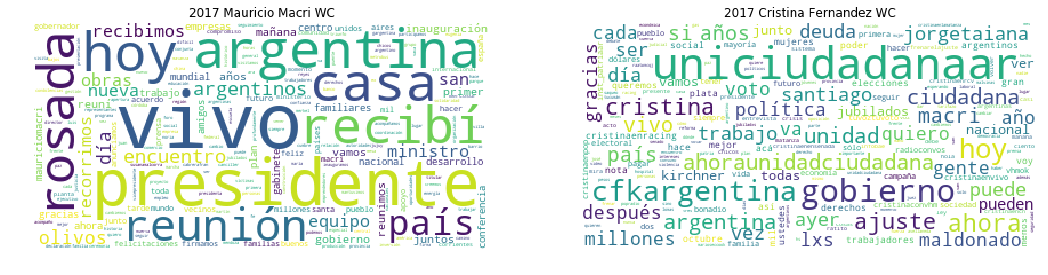

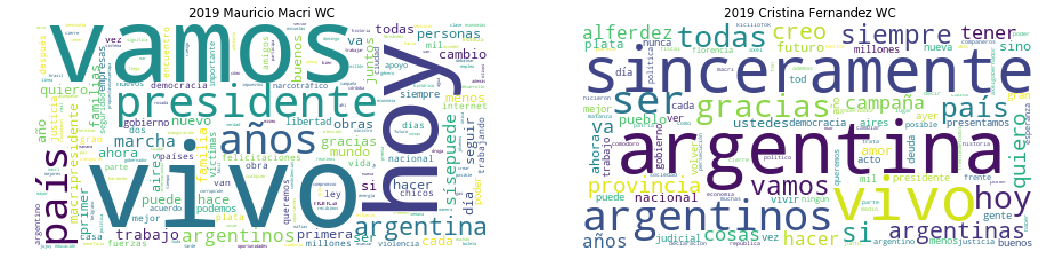

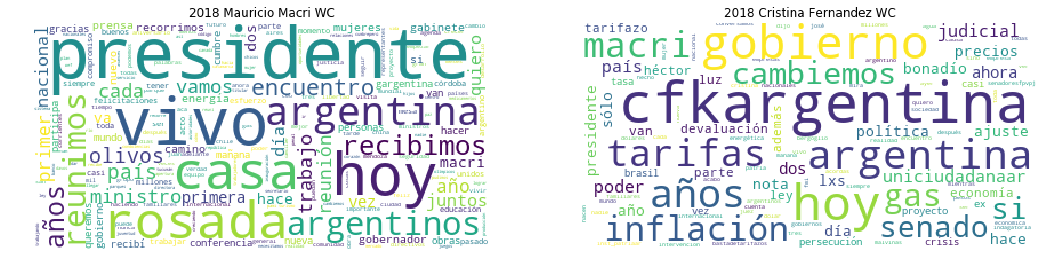

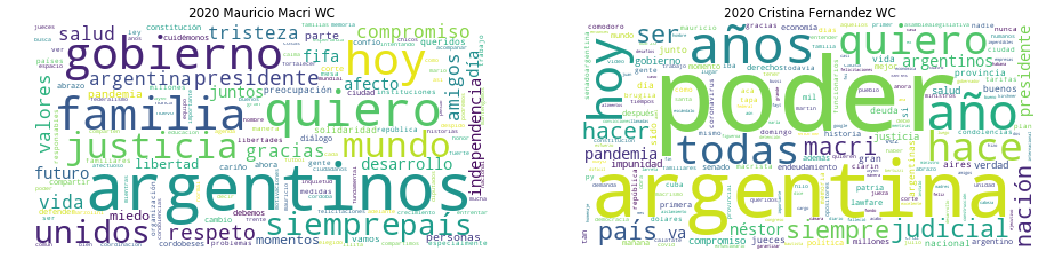

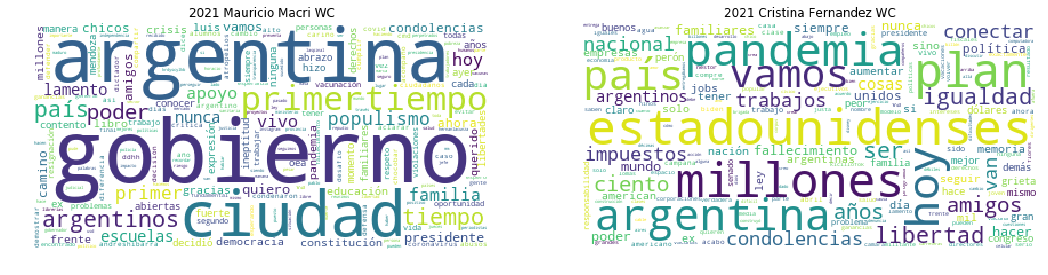

In [25]:
plt.rcParams['figure.figsize'] = [18 , 20]
for year in years:
    cloud = WordCloud(background_color='white')
    mm_tweets = vectors.loc[(pd.to_datetime(vectors.date).dt.year == year) & (vectors.index == 'Mauricio Macri'), vectors.columns != 'date']
    cfk_tweets = vectors.loc[(pd.to_datetime(vectors.date).dt.year == year) & (vectors.index == 'Cristina Kirchner'), vectors.columns != 'date']
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(cloud.generate_from_frequencies(mm_tweets.sum()))
    ax2.imshow(cloud.generate_from_frequencies(cfk_tweets.sum()))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title(f'{year} Mauricio Macri WC')
    ax2.set_title(f'{year} Cristina Fernandez WC')
    plt.show()

TfIdfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

In [27]:
stopwords_sp = stopwords.words('spanish') + ['https', 'co']

In [28]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [29]:
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode', preprocessor=removal)

In [30]:
tfidf_tokens = vectorizer.fit_transform(corpus.tweet)

In [31]:
tfidf_words = vectorizer.get_feature_names()

In [32]:
tfidf_vectors = pd.DataFrame(tokens.todense(), columns=tfidf_words, index=[f'{user}' for user in corpus.user])

In [33]:
tfidf_vectors.insert(0,'date', corpus.date.values)

In [34]:
# tfidf_vectors.to_csv("tokens/tfidf_vectors.pkl", index=False )

In [35]:
years = list(pd.to_datetime(tfidf_vectors.date).dt.year.value_counts().index.values)
people = tfidf_vectors.index.value_counts().index.values
years.remove(2016)

In [36]:
tfidf_vectors.loc[(pd.to_datetime(tfidf_vectors.date).dt.year == 2020) & (tfidf_vectors.index == 'Mauricio Macri'), tfidf_vectors.columns != 'date'].sum().sort_values(ascending=False)[:10]

argentinos    15
quiero         8
unidos         7
familia        7
hoy            7
justicia       7
gobierno       7
siempre        7
mundo          7
presidente     6
dtype: int64

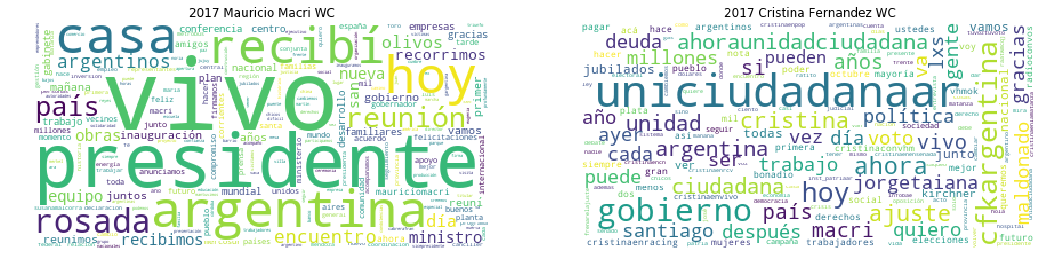

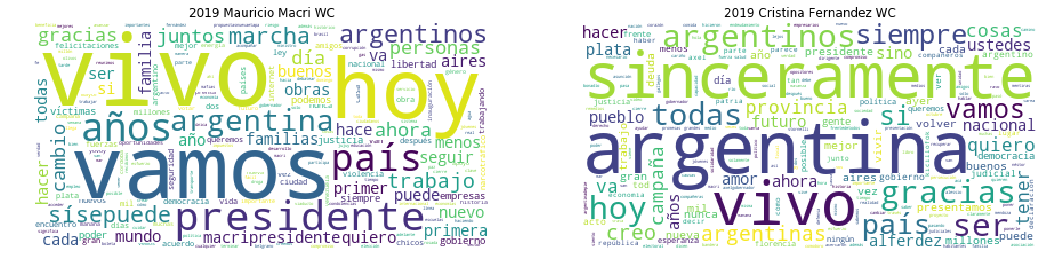

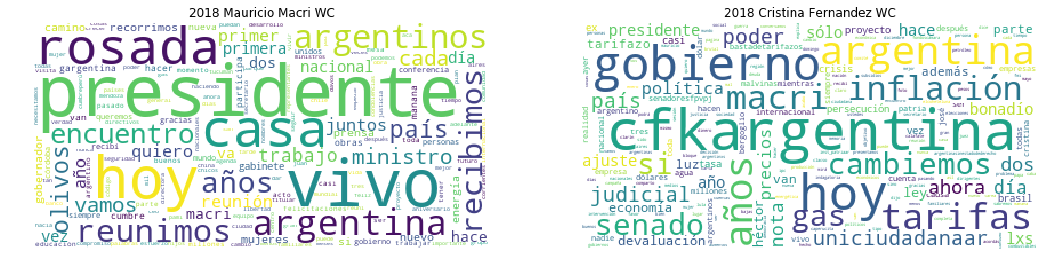

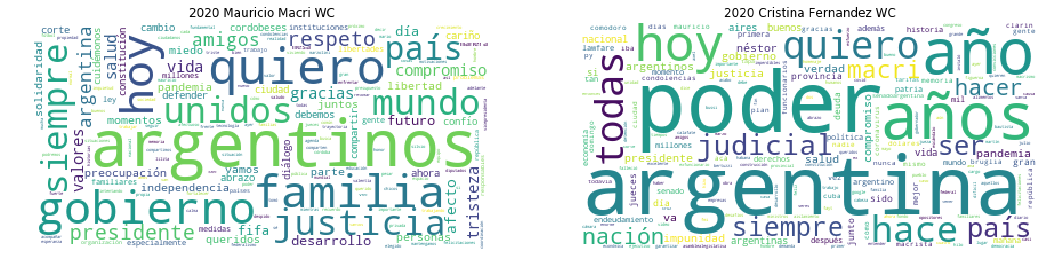

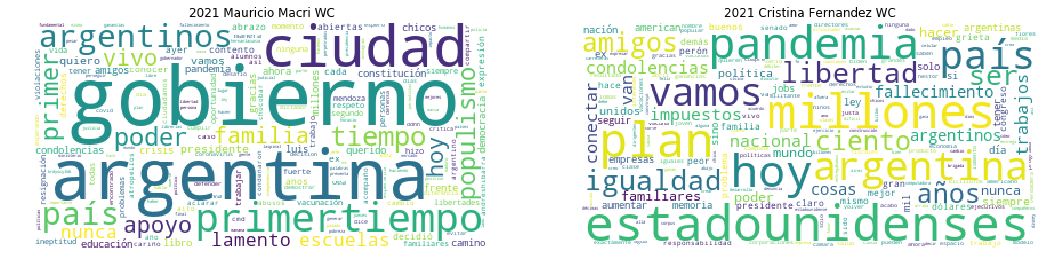

In [37]:
plt.rcParams['figure.figsize'] = [18 , 20]
for year in years:
    cloud = WordCloud(background_color='white')
    mm_tweets = tfidf_vectors.loc[(pd.to_datetime(tfidf_vectors.date).dt.year == year) & (tfidf_vectors.index == 'Mauricio Macri'), tfidf_vectors.columns != 'date']
    cfk_tweets = tfidf_vectors.loc[(pd.to_datetime(tfidf_vectors.date).dt.year == year) & (tfidf_vectors.index == 'Cristina Kirchner'), tfidf_vectors.columns != 'date']
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(cloud.generate_from_frequencies(mm_tweets.sum()))
    ax2.imshow(cloud.generate_from_frequencies(cfk_tweets.sum()))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title(f'{year} Mauricio Macri WC')
    ax2.set_title(f'{year} Cristina Fernandez WC')
    plt.show()

#### Test

In [39]:
from sklearn.decomposition import TruncatedSVD

In [44]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_vectors.drop(axis=1,labels=['date']))
P = np.around(p,3)

In [62]:
P[:(corpus.user == 'Mauricio Macri').sum(), 0]

array([1.041, 0.321, 0.202, ..., 0.072, 0.056, 0.215])

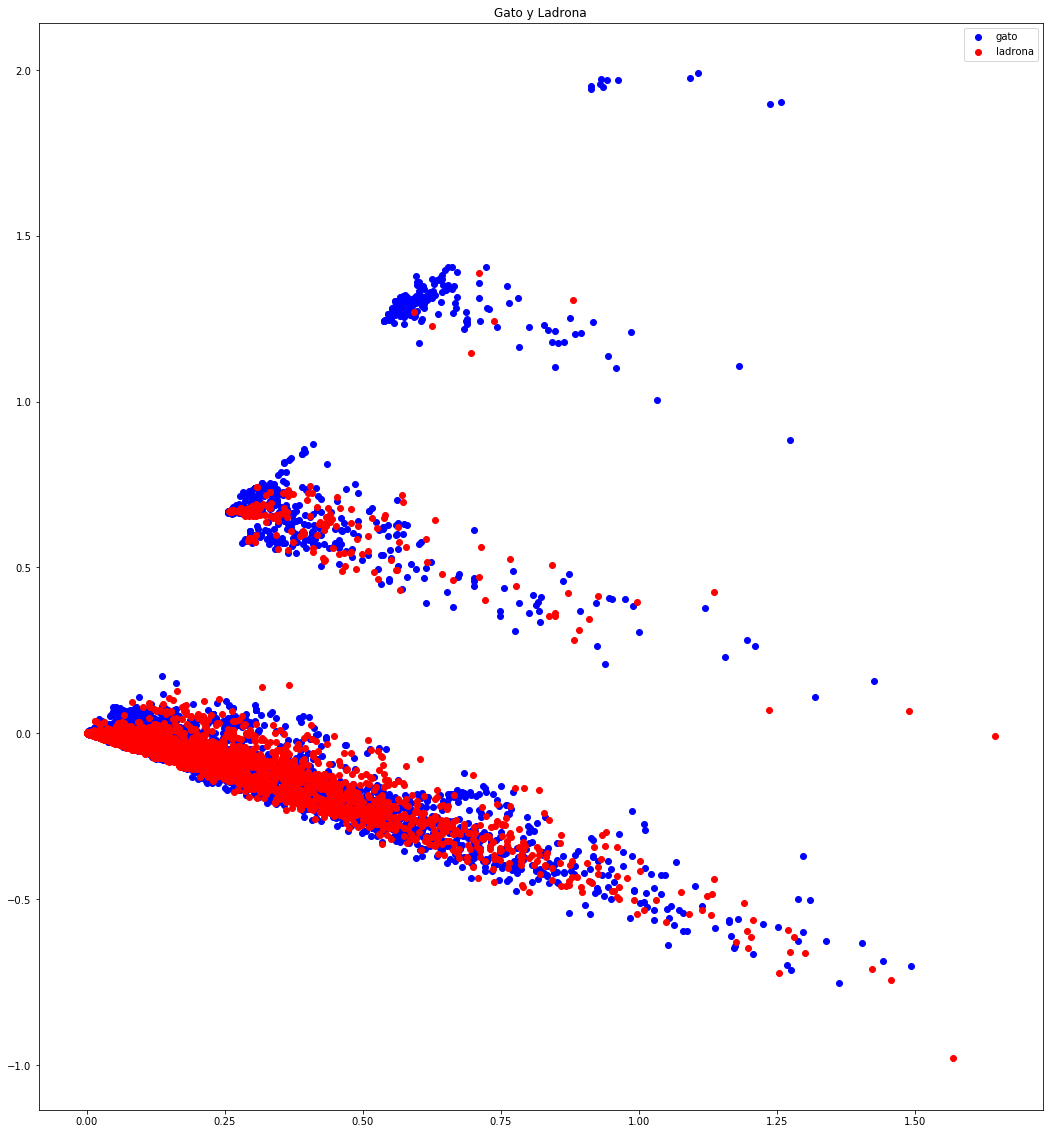

In [64]:
fig, ax = plt.subplots()

ax.scatter(P[:(corpus.user == 'Mauricio Macri').sum(), 0], P[:(corpus.user == 'Mauricio Macri').sum(),1], c='b')
ax.scatter(P[(corpus.user != 'Mauricio Macri').sum():, 0], P[(corpus.user != 'Mauricio Macri').sum():,1], c='r')

plt.title('Gato y Ladrona')
plt.legend(['gato', 'ladrona'])
plt.show()
